In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from bubbly.bubbly import bubbleplot
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
import plotly.express as px
import plotly.io as pio

In [2]:
# import lda model
n_topics = 50
n_passes = 10
model_path = f"data/lda/{n_topics}_topics/{n_passes}/model.model"
lda_model = LdaModel.load(model_path)

In [3]:
def print_topics(model, n_topics=n_topics, k_words=5):
    '''
    print all n topics of the lda model 
    '''
    for idx, topic in model.show_topics(formatted=False, num_topics=n_topics):
        label = ", ".join([word for word, prob in topic[:k_words]])
        print(f"Topic {idx}: {label}")

In [4]:
print_topics(lda_model)

Topic 0: agreement, turkey, union, convention, eu
Topic 1: trade, china, agreement, country, eu
Topic 2: public, information, transparency, commission, interest
Topic 3: energy, climate, gas, emission, change
Topic 4: development, region, policy, cohesion, fund
Topic 5: ukraine, russia, russian, war, putin
Topic 6: parliament, council, commission, work, thank
Topic 7: cultural, culture, language, diversity, heritage
Topic 8: car, road, vehicle, air, safety
Topic 9: group, party, political, election, socialist
Topic 10: nuclear, safety, sea, maritime, oil
Topic 11: border, citizen, cross, visa, union
Topic 12: eu, security, policy, union, cooperation
Topic 13: eu, people, need, money, want
Topic 14: court, defense, justice, law, sovereignty
Topic 15: datum, system, protection, ensure, information
Topic 16: mr, like, commissioner, think, need
Topic 17: child, minority, people, family, year
Topic 18: tax, company, profit, pay, taxis
Topic 19: country, union, romania, reform, croatia
Topic

In [5]:
topic_list = []
for idx, topic in lda_model.show_topics(formatted=False, num_topics=n_topics):
    label = ", ".join([word for word, prob in topic[:3]])
    topic_list.append(label)

In [6]:
df = pd.read_csv("data/df_topics_temp.csv")

In [7]:
df.head()


,Unnamed: 0,speaker,text,party,date,agenda,speechnumber,procedure_ID,partyfacts_ID,period,...,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,574117,Hannes Swoboda,"(DE) Madam President, if you continue to be th...",PSE,1999-07-20,5. Election of Quaestors1999-07-20,4,,6399.0,5,...,0.002859,0.002859,0.002859,0.002859,0.002859,0.002859,0.002859,0.002859,0.002859,0.002859
1,574084,Brian Crowley,"Mr President, I should like to thank you for g...",UEN,1999-07-20,1. Resumption of the session1999-07-20,2,,8760.0,5,...,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156
2,574089,Graham Watson,"Mr President, before moving to the election of...",ELDR,1999-07-20,2. Oldest Member1999-07-20,4,,6401.0,5,...,0.000628,0.000628,0.000628,0.000628,0.038582,0.034532,0.000628,0.144637,0.000628,0.000628
3,574092,Francis Wurtz,"(FR) Mr President, for the first time in ten y...",GUE/NGL,1999-07-20,3. Election of the President1999-07-20,2,,6402.0,5,...,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.080556,0.000625,0.000625,0.000625
4,574094,Francis Wurtz,"(FR) I agree, Mr President, but as you know, h...",GUE/NGL,1999-07-20,3. Election of the President1999-07-20,4,,6402.0,5,...,0.000371,0.000371,0.000371,0.022516,0.000371,0.000371,0.063076,0.000371,0.000371,0.000371


In [9]:
# print speeches with highest probability for a given topic
topic_id = 43
prob_col = f"topic_{topic_id}"
top_speeches = df.sort_values(by=prob_col, ascending=False).head(5)
for i, row in top_speeches.iterrows():
    print(f"Year: {row['year']} | Party block: {row['party_block']}")
    print(f"Topic probability: {row[prob_col]:.4f}")
    print(row["translatedText"], "\n")
    print("\n"+"-"*80+"\n")

Year: 2014 | Party block: christian_conservative
Topic probability: 0.8193
The creation of a single European railway area can no longer wait. It is necessary to increase the share of rail transport compared to road transport to reduce pollution and road traffic. Railways must become a reliable and attractive means of transport throughout Europe. Their liberalization must serve to relaunch the entire sector by making it more competitive and with increasingly higher quality services. 


--------------------------------------------------------------------------------

Year: 2012 | Party block: social_democratic
Topic probability: 0.6869
The construction of a safe, modern integrated railway network is one of the EU’s major priorities. Railways must become more competitive and offer high-quality, end-to-end services without being restricted by national borders. I voted in favour. 


--------------------------------------------------------------------------------

Year: 2014 | Party block: c

In [8]:
df.shape

(461949, 71)

In [9]:
# exclude all written speeches
df = df[df['written'] == True]
df.shape

(233926, 71)

In [10]:
# add new column, where for each row, the topic with the highest probability is selected
df['dominant_topic_id'] = df.loc[:, 'topic_0':'topic_49'].idxmax(axis=1)
df['dominant_topic'] = df['dominant_topic_id'].apply(lambda x: topic_list[int(x.split('_')[1])])

In [11]:
df.head()

,Unnamed: 0,speaker,text,party,date,agenda,speechnumber,procedure_ID,partyfacts_ID,period,...,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,dominant_topic_id,dominant_topic
309,573477,Harlem Désir,(FR) The record levels of abstention at the Eu...,PSE,1999-09-15,9. Votes1999-09-15,30,,6399.0,5,...,0.000121,0.000121,0.045625,0.000121,0.018937,0.000121,0.000121,0.000121,topic_26,"fishing, fishery, fish"
311,573485,Marie-Noëlle Lienemann,(FR) The vote on the ratification of the Commi...,PSE,1999-09-15,9. Votes1999-09-15,38,,6399.0,5,...,0.000139,0.000139,0.082713,0.000139,0.000139,0.000139,0.000139,0.000139,topic_26,"fishing, fishery, fish"
312,573484,"Richard Fletcher-Vane, 2. Baron Inglewood",Over the winter of 1998/99 the European Parlia...,PPE-DE,1999-09-15,9. Votes1999-09-15,37,,6398.0,5,...,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,topic_27,"worker, company, fund"
313,573483,Ian Hudghton,My main consideration in passing judgement on ...,Greens/EFA,1999-09-15,9. Votes1999-09-15,36,,6403.0,5,...,0.000223,0.000223,0.071685,0.000223,0.000223,0.086596,0.000223,0.000223,topic_26,"fishing, fishery, fish"
314,573482,Gahrton and Schörling,(SV) In spite of the fact that some of the Com...,Greens/EFA,1999-09-15,9. Votes1999-09-15,35,,6403.0,5,...,0.000223,0.000223,0.056523,0.000223,0.000223,0.104640,0.000223,0.000223,topic_27,"worker, company, fund"


In [12]:
print(df['party_adj'].unique())

['PSE/S&D' 'PPE' 'Greens/EFA' 'NGL/The Left' 'UEN' 'INDDEM/EDD'
 'ELDR/ALDE/Renew' 'ENF/ID' 'EFD' 'ECR']


In [13]:
# rough left - right classification: should be replaced by chess data later - 1 left to 10 right
party_dict = {"PSE/S&D": 3,
              "PPE": 7,
                "ELDR/ALDE/Renew": 5,
                "Greens/EFA": 2,
                "ENF/ID": 9,
                "ECR": 8,
                "NGL/The Left": 1,
                "UEN" : 7,
                "EFD" : 8,
                "INDDEM/EDD": 7}
df['party_pos'] = df['party_adj'].map(party_dict)


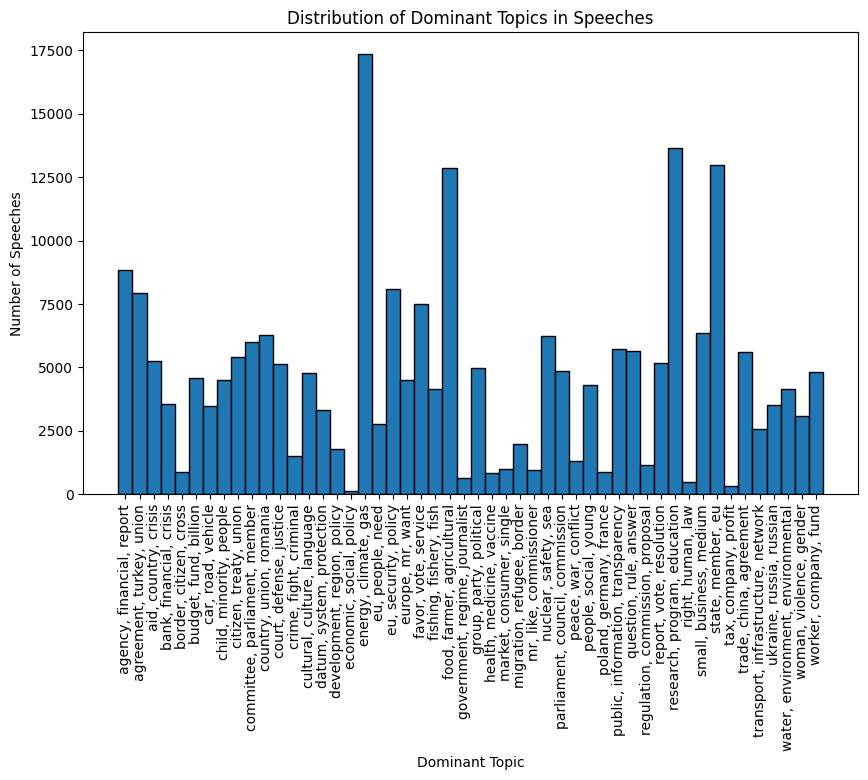

In [14]:
# histogram of dominant topics
plt.figure(figsize=(10,6))
plt.hist(df['dominant_topic'].sort_values(), bins=np.arange(-0.5, 50.5, 1), edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Dominant Topic')
plt.ylabel('Number of Speeches')
plt.title('Distribution of Dominant Topics in Speeches')
plt.show()

In [15]:
df_dominant = df.groupby(['dominant_topic', 'year']).agg({
    'text': 'count',
    'party_pos': 'mean'
}).reset_index().rename(columns={'text': 'count', 'party_pos': 'avg_party_pos'})

# Calculate total speeches per year
year_totals = df_dominant.groupby('year')['count'].sum().reset_index()
year_totals.columns = ['year', 'total_count']

# Merge and calculate ratio
df_dominant = df_dominant.merge(year_totals, on='year')
df_dominant['ratio'] = df_dominant['count'] / df_dominant['total_count']

In [16]:
df_dominant.head()

,dominant_topic,year,count,avg_party_pos,total_count,ratio
0,"agency, financial, report",2000,3,1.666667,1079,0.002780
1,"agency, financial, report",2001,3,1.666667,1038,0.002890
2,"agency, financial, report",2002,4,2.500000,1111,0.003600
3,"agency, financial, report",2003,6,5.000000,1589,0.003776
4,"agency, financial, report",2004,19,5.842105,1253,0.015164


In [21]:
# Create a mapping of topics to y-axis positions
topic_y_positions = {topic: i for i, topic in enumerate(sorted(df_dominant['dominant_topic'].unique()))}
df_dominant['y_pos'] = df_dominant['dominant_topic'].map(topic_y_positions)

fig = px.scatter(
    df_dominant,
    x="avg_party_pos",
    y="y_pos",
    size="ratio",
    color="dominant_topic",
    animation_frame="year",
    hover_name="dominant_topic",
    size_max=80
)

fig.update_yaxes(
    tickvals=list(topic_y_positions.values()),
    ticktext=list(topic_y_positions.keys()),
    visible=True
)
fig.update_layout(
    title="Topic prominence by year",
    xaxis_title="Average political position",
    yaxis_title="Topics",
    showlegend=True
)

pio.renderers.default = "browser"
fig.show()
